Swaraj Khan Pathan


ENG21CS0433

Topic : Logistic Regression
Dataset : Social Network Ads

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [8]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [55]:
df = df.drop(columns=['Gender'])

In [56]:
print("Number of records in each label are")
print(df['Purchased'].value_counts())

print("\nPercentage of records in each label are")
print(df['Purchased'].value_counts() * 100 / df.shape[0], "\n")

Number of records in each label are
Purchased
0    257
1    143
Name: count, dtype: int64

Percentage of records in each label are
Purchased
0    64.25
1    35.75
Name: count, dtype: float64 



In [57]:
def sigmoid(x):
    return pd.Series(1 / ( 1 + np.exp(-x)))

In [58]:
df['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

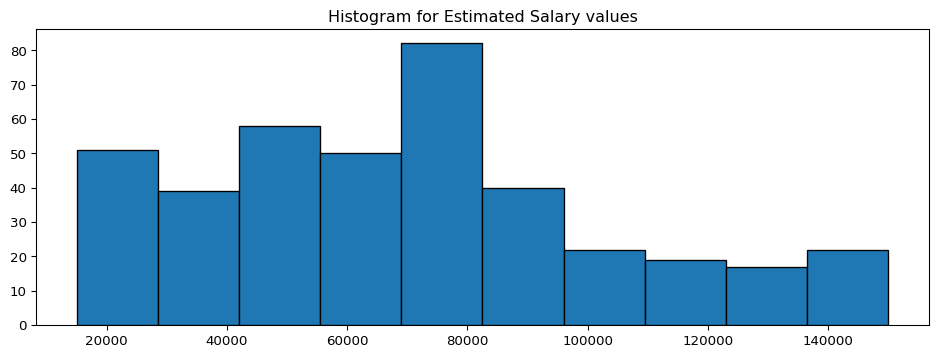

In [92]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("Histogram for Estimated Salary values")
plt.hist(df['EstimatedSalary'], bins = 'sturges', edgecolor = 'black')
plt. show()

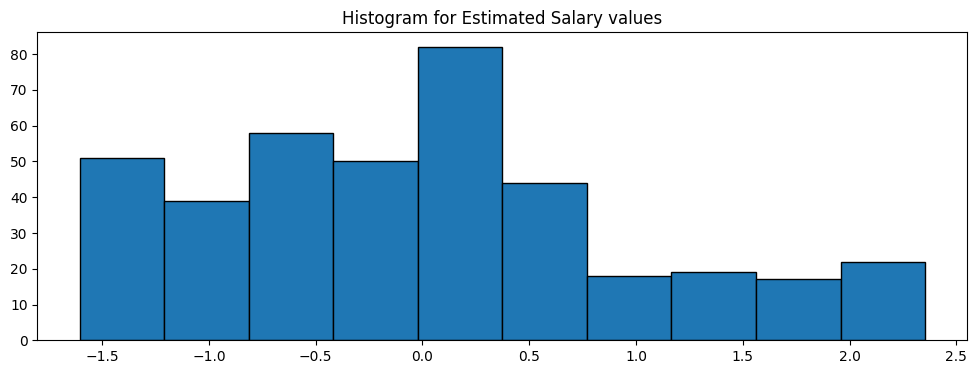

In [95]:
def standard_scalar(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
scaled_chol = standard_scalar(df['EstimatedSalary'])

plt.figure(figsize = (12,4))
plt.title("Histogram for Estimated Salary values")
plt.hist(scaled_chol, bins = 'sturges', edgecolor = 'black')
plt.show()

In [61]:
chol_sig_output = sigmoid(df['EstimatedSalary'])
chol_sig_output.describe()

count    400.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: EstimatedSalary, dtype: float64

In [62]:
scaled_chol_sig_output = sigmoid(scaled_chol)
scaled_chol_sig_output.describe()

count    400.000000
mean       0.493787
std        0.210634
min        0.167215
25%        0.313392
50%        0.501888
75%        0.630755
max        0.913236
Name: EstimatedSalary, dtype: float64

In [63]:
def predict(sig_output, threshold):
    y_pred = [ 1 if output >= threshold else 0 for output in sig_output]
    return pd.Series(y_pred)

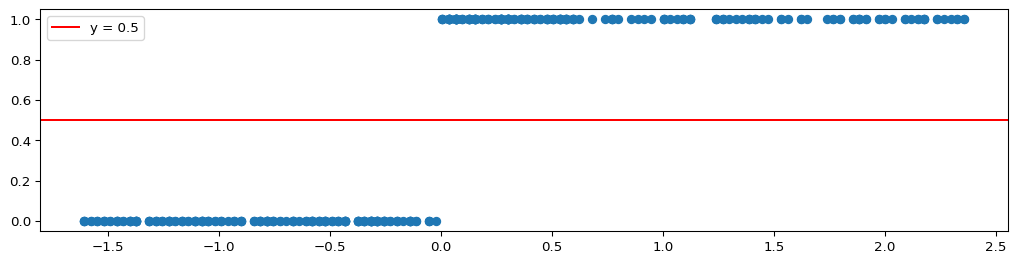

In [64]:
threshold = 0.5
heart_disease_pred = predict(scaled_chol_sig_output, threshold)

plt.figure(figsize=(13,3), dpi = 96)
plt.scatter(scaled_chol, heart_disease_pred)
plt.axhline(y = threshold, label = f'y = { threshold }', color = 'r')
plt. legend()
plt.show()

In [65]:
print(f"Threshold value: {threshold}")
print(f"\nPredicted value counts:\n{heart_disease_pred.value_counts()}")
print(f"\nActual value counts:\n{df['Purchased']. value_counts()}")


Threshold value: 0.5

Predicted value counts:
1    201
0    199
Name: count, dtype: int64

Actual value counts:
Purchased
0    257
1    143
Name: count, dtype: int64


In [66]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Purchased'], heart_disease_pred))

[[152 105]
 [ 47  96]]


In [67]:
from sklearn.metrics import classification_report

print(classification_report(df['Purchased'], heart_disease_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67       257
           1       0.48      0.67      0.56       143

    accuracy                           0.62       400
   macro avg       0.62      0.63      0.61       400
weighted avg       0.66      0.62      0.63       400



In [68]:
X = df.drop(columns='Purchased')
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train[['Age', 'EstimatedSalary']]
X_test = X_test[['Age', 'EstimatedSalary']]

In [69]:
print(X_train.columns)

Index(['Age', 'EstimatedSalary'], dtype='object')


In [73]:
from sklearn.metrics import classification_report

print(classification_report(df['Purchased'], heart_disease_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67       257
           1       0.48      0.67      0.56       143

    accuracy                           0.62       400
   macro avg       0.62      0.63      0.61       400
weighted avg       0.66      0.62      0.63       400



In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Purchased')
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [76]:
from sklearn.linear_model import LogisticRegression

log_clf_1 = LogisticRegression()
log_clf_1.fit(X_train, y_train)
print(log_clf_1.score(X_train, y_train))

y_train_pred = log_clf_1.predict(X_train)

print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))

print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))

0.7857142857142857

 Confusion Matrix 

[[176   8]
 [ 52  44]]

 Classification Report

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       184
           1       0.85      0.46      0.59        96

    accuracy                           0.79       280
   macro avg       0.81      0.71      0.72       280
weighted avg       0.80      0.79      0.77       280



In [77]:
y_test_pred = log_clf_1.predict(X_test)

print(f"{'Test Set'.upper()}\n{'-' * 75}\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

TEST SET
---------------------------------------------------------------------------
Confusion Matrix:
[[70  3]
 [28 19]]

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        73
           1       0.86      0.40      0.55        47

    accuracy                           0.74       120
   macro avg       0.79      0.68      0.68       120
weighted avg       0.77      0.74      0.71       120



In [78]:
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

norm_X_train = X_train.apply(standard_scaler, axis = 0)
norm_X_test = X_test.apply(standard_scaler, axis = 0)

norm_X_train.describe()

,User ID,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02,2.800000e+02
mean,-1.162245e-14,-2.727977e-16,1.141944e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.617776e+00,-1.919870e+00,-1.637459e+00
25%,-9.359534e-01,-7.429381e-01,-7.832241e-01
50%,2.422696e-02,-5.639464e-02,1.209816e-02
75%,8.382109e-01,7.282264e-01,5.128566e-01
max,1.733614e+00,2.199391e+00,2.339152e+00


In [91]:
norm_X_test.describe()

,User ID,Age,EstimatedSalary
count,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.290819e-14,-1.776357e-16,-1.480297e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.969094e+00,-1.777024e+00,-1.500368e+00
25%,-8.521415e-01,-8.142517e-01,-7.902776e-01
50%,-1.305879e-02,-7.537986e-02,-1.381537e-01
75%,8.573696e-01,8.202224e-01,5.284619e-01
max,1.701918e+00,1.984505e+00,2.383392e+00


In [89]:
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

dict_rfe = {}

for i in range(1, len(X_train.columns) + 1):
  lg_clf_2 = LogisticRegression()
  rfe = RFE(lg_clf_2,n_features_to_select=i) 
  rfe.fit(norm_X_train, y_train)

  rfe_features = list(norm_X_train.columns[rfe.support_]) 
  rfe_X_train = norm_X_train[rfe_features]

  lg_clf_3 = LogisticRegression()
  lg_clf_3.fit(rfe_X_train, y_train)

  y_test_pred = lg_clf_3.predict(norm_X_test[rfe_features])

  f1_scores_array = f1_score(y_test, y_test_pred, average = None)
  dict_rfe[i] = {"features": list(rfe_features), "f1_score": f1_scores_array} 

In [90]:
dict_rfe

{1: {'features': ['Age'], 'f1_score': array([0.9044586 , 0.81927711])},
 2: {'features': ['Age', 'EstimatedSalary'],
  'f1_score': array([0.88888889, 0.76923077])},
 3: {'features': ['User ID', 'Age', 'EstimatedSalary'],
  'f1_score': array([0.88198758, 0.75949367])}}